In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sensors import *
from functools import partial

In [2]:
# Отношение расстояния между датчиками к длине волны
dist_ratio = 0.5

# Первый случай

Имеется 5 сенсоров, 1 источник, шум больше сигнала примерно в 6 раз

In [3]:
Num_sensors1 = 5
Num_emitters1 = 1
sample_size1 = 100
theta1_rad = [0.5] # Направление прибытия (DOA) в радианах
# Истинное DOA в градусах
theta1_deg = rad_to_deg(theta1_rad[0])
GS_1 = np.array([[0.7]]) # Ковариация сигнала
GN_1 = 4.1*np.eye(5, dtype=np.float64) # Ковариация шума
A1 = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors1).reshape(-1,1) * np.sin(theta1_rad).reshape(1,-1)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
s1 = CN(Num_emitters1, sample_size1, GS_1)
n1 = CN(Num_sensors1, sample_size1, GN_1)
X1 = (A1 @ s1.T + n1.T).T

In [4]:
EM_theta1_rad, neglhd_1, K1, mu1 = multi_start(10, X1, GS_1, GN_1, max_iter=50, eps=1e-6)

0-th start
Iteration=1, theta_new=[-0.12064115], -likelihood = -66.72143
Iteration=2, theta_new=[-0.1159286], -likelihood = -66.90140
Iteration=3, theta_new=[-0.11103786], -likelihood = -67.09307
Iteration=4, theta_new=[-0.10600646], -likelihood = -67.29890
Iteration=5, theta_new=[-0.10078896], -likelihood = -67.51707
Iteration=6, theta_new=[-0.09551328], -likelihood = -67.74920
Iteration=7, theta_new=[-0.09014066], -likelihood = -67.98896
Iteration=8, theta_new=[-0.08471814], -likelihood = -68.23729
Iteration=9, theta_new=[-0.0792247], -likelihood = -68.49115
Iteration=10, theta_new=[-0.0737161], -likelihood = -68.75057
Iteration=11, theta_new=[-0.0681874], -likelihood = -69.01199
Iteration=12, theta_new=[-0.06270044], -likelihood = -69.27470
Iteration=13, theta_new=[-0.05721415], -likelihood = -69.53492
Iteration=14, theta_new=[-0.05185033], -likelihood = -69.79382
Iteration=15, theta_new=[-0.04650326], -likelihood = -70.04503
Iteration=16, theta_new=[-0.04127164], -likelihood = -70.

In [5]:
EM_theta1_deg = rad_to_deg(EM_theta1_rad)

In [6]:
print(f"Погрешность в смысле разности углов в градусах: {np.abs(EM_theta1_deg-theta1_deg)}.\nПогрешность в смысле разности синусов углов {np.abs(np.sin(EM_theta1_rad)-np.sin(theta1_rad))}.")

Погрешность в смысле разности углов в градусах: [0.69722931].
Погрешность в смысле разности синусов углов [0.0106435].


# Второй случай

Имеется 5 сенсоров, 2 источника (дисперсии сигналов - 2 и 3), дисперсия шума на каждом сенсоре - 7.1

In [7]:
Num_sensors2 = 5
Num_emitters2 = 2
sample_size2 = 100
theta2_rad = np.array([0.34906585, 1.22173048]) # Направление прибытия (DOA) в радианах
theta2_deg = rad_to_deg(theta2_rad)
GS_2 = np.array([[2,0],[0,3]]) # Ковариация сигнала
GN_2 = 7.1*np.eye(5, dtype=np.float64) # Ковариация шума
A2 = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors2).reshape(-1,1) * np.sin(theta2_rad).reshape(1,-1)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
s2 = CN(Num_emitters2, sample_size2, GS_2)
n2 = CN(Num_sensors2, sample_size2, GN_2)
X2 = (A2 @ s2.T + n2.T).T

In [8]:
EM_theta2_rad, neglhd_2, K2, mu2 = multi_start(10, X2, GS_2, GN_2, max_iter=20, eps=1e-6)

0-th start
Iteration=1, theta_new=[-1.68808565  0.62848511], -likelihood = -388.00456
Iteration=2, theta_new=[-1.57083198  0.60704024], -likelihood = -395.35622
Iteration=3, theta_new=[-1.57084746  0.58253562], -likelihood = -402.00262
Iteration=4, theta_new=[-1.57079105  0.55592436], -likelihood = -409.52188
Iteration=5, theta_new=[-1.57080515  0.52820492], -likelihood = -418.70608
Iteration=6, theta_new=[-1.57077176  0.50069745], -likelihood = -429.10985
Iteration=7, theta_new=[-1.57082419  0.47464157], -likelihood = -439.85928
Iteration=8, theta_new=[-1.57076221  0.45089574], -likelihood = -449.96815
Iteration=9, theta_new=[-1.57082319  0.42994058], -likelihood = -458.70742
Iteration=10, theta_new=[-1.57075468  0.4118634 ], -likelihood = -465.74201
Iteration=11, theta_new=[-1.5707766   0.39652409], -likelihood = -471.10742
Iteration=12, theta_new=[-1.57079841  0.3836398 ], -likelihood = -475.03941
Iteration=13, theta_new=[-1.57081449  0.372892  ], -likelihood = -477.84322
Iteration=

In [9]:
EM_theta2_deg = rad_to_deg(EM_theta2_rad)

In [10]:
print(f"Погрешность в смысле разности углов в градусах: {np.abs(EM_theta2_deg-theta2_deg)}.\nПогрешность в смысле разности синусов углов {np.abs(np.sin(EM_theta2_rad)-np.sin(theta2_rad))}.")

Погрешность в смысле разности углов в градусах: [  0.21841015 159.99746258].
Погрешность в смысле разности синусов углов [0.00357959 1.93969262].


## Теперь имеет смысл определить примерный вид функции, оптимизируемой на М-шаге:

In [11]:
W1, W2 = goal_function(X1, GS_1, GN_2, 50)

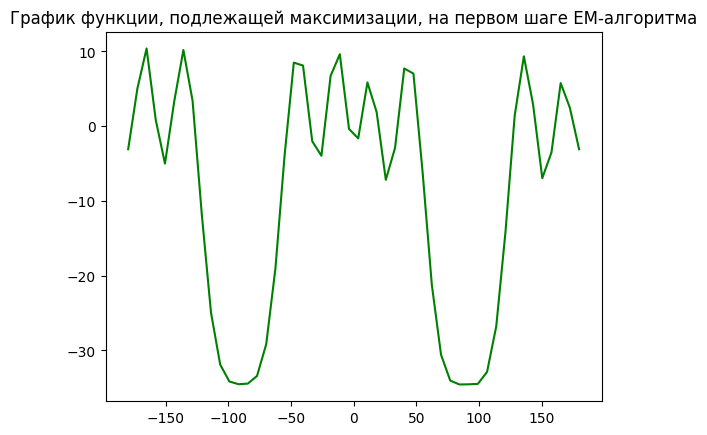

In [12]:
plt.title("График функции, подлежащей максимизации, на первом шаге ЕМ-алгоритма")
plt.plot(rad_to_deg(W1), W2.real, color='green')

Теперь проведем сравнение с **CAPON**:

In [13]:
R = space_covariance_matrix(X1)
angles = np.linspace(-1*np.pi, np.pi, 1000)
Powers = []
for angle in angles:
    a = steering_vector(dist_ratio, angle, 5)
    Powers.append(capon_func(a,R).real)

In [14]:
angles[np.argmax(Powers)]*180/np.pi

29.369369369369345

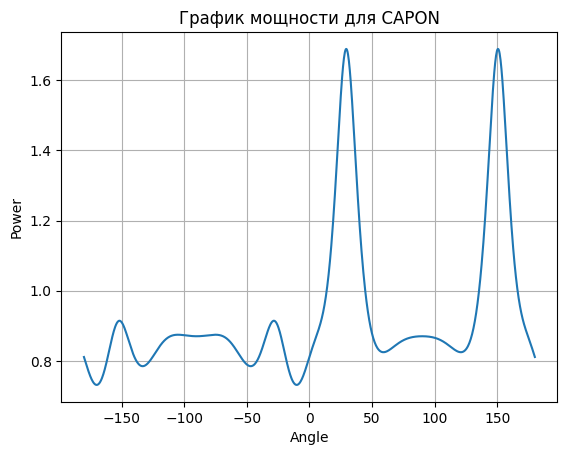

In [15]:
plt.title("График мощности для CAPON")
plt.plot(angles*180/np.pi, Powers) 
plt.xlabel("Angle")
plt.ylabel("Power")
plt.grid()
plt.show()

In [16]:
angles_near = np.linspace(0.5-0.1, 0.5+0.1, 100)
Powers_near = []
for angle in angles_near:
    a = steering_vector(dist_ratio, angle, 5)
    Powers_near.append(capon_func(a,R).real)

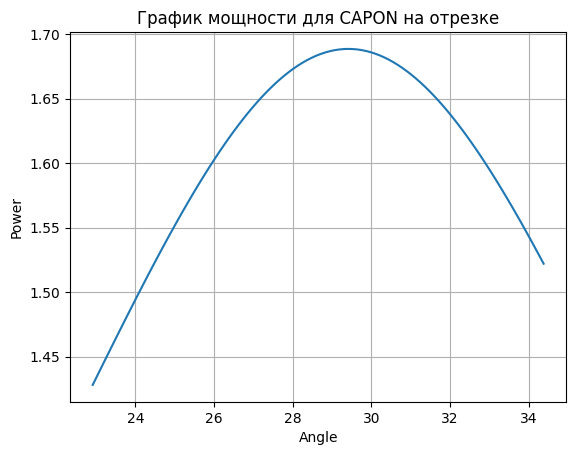

In [17]:
plt.title("График мощности для CAPON на отрезке")
plt.plot(rad_to_deg(angles_near), Powers_near) 
plt.xlabel("Angle")
plt.ylabel("Power")
plt.grid()
plt.show()

# Оценка **CAPON** в градусах для первого случая

In [18]:
capon_theta1_deg = rad_to_deg(angles_near[np.argmax(Powers_near)])

In [19]:
print(f"Оценка CAPON: {capon_theta1_deg}, \nОценка ЕМ-алгоритма: {EM_theta1_deg}, \nИстинное значение: {theta1_deg}")

Оценка CAPON: 29.40025857843012, 
Оценка ЕМ-алгоритма: [29.34511906], 
Истинное значение: 28.64788975654116


# Третий случай

Имеется 7 сенсоров, 3 источника разных по силе (соотношение 1:5:9), шум на всех сенсорах одинаковый и немного превосходит силу сигнала.

In [20]:
Num_sensors3 = 7
Num_emitters3 = 3
sample_size3 = 100
theta3_rad = [0.5, 1.2, 1.6] # Направление прибытия (DOA) в радианах
# Истинное DOA в градусах
theta3_deg = rad_to_deg(theta3_rad[0])
GS_3 = np.diag([0.1, 0.5, 0.9]) # Ковариация сигнала
GN_3 = 1.1*np.eye(7, dtype=np.float64) # Ковариация шума
A3 = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors3).reshape(-1,1) * np.sin(theta3_rad).reshape(1,-1)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
s3 = CN(Num_emitters3, sample_size3, GS_3)
n3 = CN(Num_sensors3, sample_size3, GN_3)
X3 = (A3 @ s3.T + n3.T).T

In [21]:
EM_theta3_rad, neglhd_3, K3, mu3 = multi_start(25, X3, GS_3, GN_3, max_iter=20, eps=1e-6)

0-th start
Iteration=1, theta_new=[-0.91246643  2.15872758 -1.19824617], -likelihood = -1033.76741
Iteration=2, theta_new=[-0.86443121  2.13895376 -1.22829434], -likelihood = -1086.46397
Iteration=3, theta_new=[-0.82915311  2.12536315 -1.2515711 ], -likelihood = -1106.55025
Iteration=4, theta_new=[-0.80146691  2.11576564 -1.27005413], -likelihood = -1116.37662
Iteration=5, theta_new=[-0.778842    2.10894574 -1.28485124], -likelihood = -1121.95888
Iteration=6, theta_new=[-0.75985096  2.10416969 -1.29666918], -likelihood = -1125.48954
Iteration=7, theta_new=[-0.74365034  2.10090203 -1.3061424 ], -likelihood = -1127.91209
Iteration=8, theta_new=[-0.7296805   2.09869274 -1.31380447], -likelihood = -1129.68062
Iteration=9, theta_new=[-0.71740113  2.09718948 -1.32000446], -likelihood = -1131.02935
Iteration=10, theta_new=[-0.70650872  2.09626734 -1.32506483], -likelihood = -1132.09982
Iteration=11, theta_new=[-0.6968888   2.09564774 -1.32932447], -likelihood = -1132.97391
Iteration=12, theta

In [22]:
EM_theta3_rad

array([ 0.93984585, -1.57076356,  0.49219511])

# Четвертый случай

Имеется 7 сенсоров и 3 источника, сигналы одинаковы по силе, шум примерно вдвое превосходит сигнал.

In [23]:
Num_sensors4 = 7
Num_emitters4 = 3
sample_size4 = 100
theta4_rad = [0.5, 1.1, -0.3] # Направление прибытия (DOA) в радианах
# Истинное DOA в градусах
theta4_deg = rad_to_deg(theta4_rad[0])
GS_4 = np.diag([0.5, 0.5, 0.5]) # Ковариация сигнала
GN_4 = 1.1*np.eye(7, dtype=np.float64) # Ковариация шума
A4 = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors4).reshape(-1,1) * np.sin(theta4_rad).reshape(1,-1)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
s4 = CN(Num_emitters4, sample_size4, GS_4)
n4 = CN(Num_sensors4, sample_size4, GN_4)
X4 = (A4 @ s4.T + n4.T).T

In [ ]:
EM_theta4_rad, neglhd_4, K4, mu4 = multi_start(30, X4, GS_4, GN_4, max_iter=20, eps=1e-6)

0-th start
Iteration=1, theta_new=[3.04256899 1.84657255 0.21619916], -likelihood = -564.84882
Iteration=2, theta_new=[3.04355224 1.89445184 0.24961747], -likelihood = -644.25635
Iteration=3, theta_new=[3.03830402 1.92515247 0.28353404], -likelihood = -704.15022
Iteration=4, theta_new=[3.03041949 1.94553099 0.31616196], -likelihood = -760.44719
Iteration=5, theta_new=[3.02211254 1.9595342  0.34602028], -likelihood = -812.68276
Iteration=6, theta_new=[3.01482476 1.96957042 0.37243408], -likelihood = -858.44200
Iteration=7, theta_new=[3.00921553 1.97714062 0.39532089], -likelihood = -896.26155
Iteration=8, theta_new=[3.00530237 1.98317228 0.4149367 ], -likelihood = -926.08359
Iteration=9, theta_new=[3.00300639 1.98816333 0.43151918], -likelihood = -948.81794
Iteration=10, theta_new=[3.00189556 1.99244225 0.44538389], -likelihood = -965.55750
Iteration=11, theta_new=[3.00159499 1.99605323 0.45679887], -likelihood = -977.56224
Iteration=12, theta_new=[3.00192746 1.99924259 0.46614658], -li

In [ ]:
EM_theta4_rad